In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates
import numpy as np

In [61]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/Projects/Badin-WASH Project/'

In [62]:
data = pd.read_csv(path+'/CHIRPS.csv')
data['date'] = pd.to_datetime(data['date'],format = '%d/%m/%Y')
data

,date,tp in mm
0,1981-01-01,0.0000
1,1981-01-02,0.0000
2,1981-01-03,0.0000
3,1981-01-04,0.0000
4,1981-01-05,0.0000
...,...,...
15547,2023-07-27,0.6072
15548,2023-07-28,0.0182
15549,2023-07-29,0.0000
15550,2023-07-30,0.0000


In [63]:
# Filter the dataframe for events with precipitation greater than 40 mm
events_greater_than_40mm = data[data['tp in mm'] > 40]
events_greater_than_40mm.describe()
events_greater_than_40mm

,date,tp in mm
1318,1984-08-11,42.4627
8243,2003-07-28,53.6628
12625,2015-07-27,59.2263
12626,2015-07-28,41.2652
14486,2020-08-30,44.6232


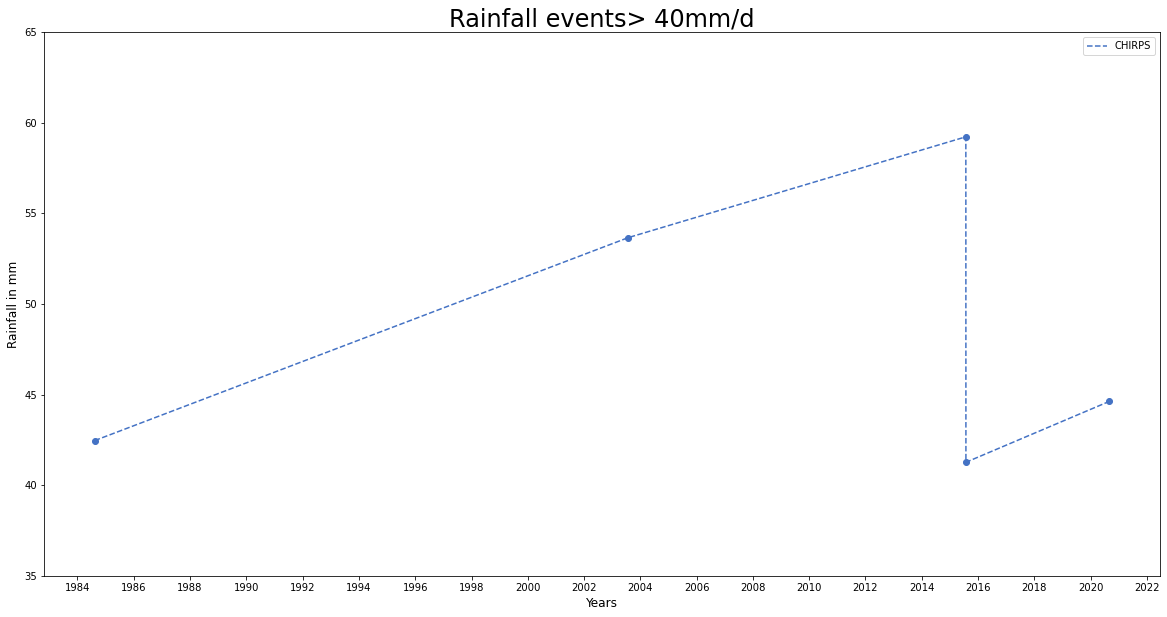

In [115]:
fig, axs = plt.subplots(figsize=(20,10))
axs.scatter(events_greater_than_40mm['date'], events_greater_than_40mm['tp in mm'], color='#4472C4', marker='o')
axs.plot(events_greater_than_40mm['date'], events_greater_than_40mm['tp in mm'], linestyle='--',color='#4472C4',label='CHIRPS')
# axs.scatter(events1['Date'], events1['PMD'],color='black',marker='o')
# axs.plot(events1['Date'], events1['PMD'],linestyle='--', color='black',label='Observed')
# axs.scatter(events3['Date'], events3['ERA5'],color='#FF0000',marker='o')
# axs.plot(events3['Date'], events3['ERA5'],linestyle='--', color='#FF0000',label='ERA5')
axs.set_title('Rainfall events> 40mm/d',fontsize='24')
axs.set_ylabel('Rainfall in mm',fontsize='12')
axs.set_xlabel('Years',fontsize='12')
# Create a horizontal line at y = 0 directly on the Axes object
# axs.axhline(y=50, color='r', linestyle='-', label='Horizontal Line at y=40')
date_fmt = mdates.DateFormatter('%Y')
axs.xaxis.set_major_formatter(date_fmt)
axs.set_ylim(35,65,5)
axs.xaxis.set_major_locator(mdates.YearLocator(2))
axs.legend(loc='upper right')


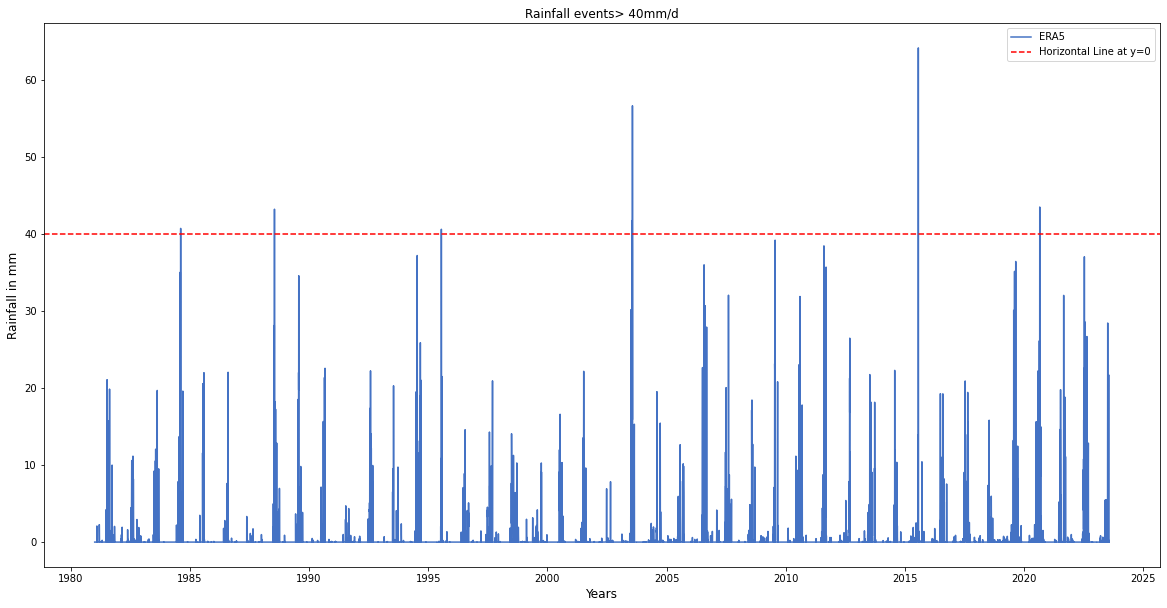

In [58]:
fig, axs = plt.subplots(figsize=(20,10))
# axs.scatter(data['date'], events_greater_than_40mm['tp in mm'], color='#4472C4', marker='o')
axs.plot(data['date'], data['tp in mm'], linestyle='-',color='#4472C4',label='ERA5')
# axs.scatter(events1['Date'], events1['PMD'],color='black',marker='o')
# axs.plot(events1['Date'], events1['PMD'],linestyle='--', color='black',label='Observed')
# axs.scatter(events3['Date'], events3['ERA5'],color='#FF0000',marker='o')
# axs.plot(events3['Date'], events3['ERA5'],linestyle='--', color='#FF0000',label='ERA5')
axs.set_title('Rainfall events> 40mm/d')
axs.set_ylabel('Rainfall in mm',fontsize='12')
# Create a horizontal line at y = 0 directly on the Axes object
axs.axhline(y=40, color='r', linestyle='--', label='Horizontal Line at y=0')
axs.set_xlabel('Years',fontsize='12')
# date_fmt = mdates.DateFormatter('%Y')
# axs.xaxis.set_major_formatter(date_fmt)
# axs.xaxis.set_major_locator(mdates.YearLocator(2))
axs.legend(loc='upper right')

In [77]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data

,date,tp in mm,month,year
0,1981-01-01,0.0000,1,1981
1,1981-01-02,0.0000,1,1981
2,1981-01-03,0.0000,1,1981
3,1981-01-04,0.0000,1,1981
4,1981-01-05,0.0000,1,1981
...,...,...,...,...
15547,2023-07-27,0.6072,7,2023
15548,2023-07-28,0.0182,7,2023
15549,2023-07-29,0.0000,7,2023
15550,2023-07-30,0.0000,7,2023


In [92]:
sum['monthly sum']= data.groupby(['month','year'])['tp in mm'].sum()

In [108]:
df_sum = pd.DataFrame(sum).reset_index()
df_sum.head(40)

,month,year,tp in mm
0,1,1981,0.0
1,1,1982,0.0
2,1,1983,0.0
3,1,1984,0.0
4,1,1985,0.0
5,1,1986,0.2273
6,1,1987,0.0
7,1,1988,1.1775
8,1,1989,0.0
9,1,1990,0.0
